In [1]:
# 環境の問題：　 libiomp5.dylib というファイルがダブってる。その対応
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

# 1：tensorflowには2つの書き方がある

## Sequential モデル
### ネットワークを1列に積みかせねていく、シンプルな方法
### 書式：

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
# define model
model = Sequential()

# add layers
model.add(Dense(units=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(units=10))
model.add(Activation("softmax"))

# define training process
model.compile(loss="categorical_crossentropy",
                         optimizer="sgd",
                         metrics=["accuracy"])

# run training
model.fit(x_train, y_train, epochs=5, batchsize=32)

# run predict
classes = model.predict(x_test, batch_size=128)

## Functional API
### 複雑なネットワークの記述が可能
### Sequentialモデルと異なり、複数の出力や共有レイヤーの定義などが可能となっている
### 書式：

In [ ]:
# define Input
inputs = Input(shape(784,))

# define layers
nw = Dense(64, activation="relu")(inputs)
nw = Dense(64, activation="relu")(x)
predictions = Dense(10, activation="softmax")(x)

#define model
model = Model(inputs=inputs, outputs=predictions)

# define training process
model.compile(optimizer="rmsprop",
                          loss="categorical_crossentropy",
                          metrics=["accuracy"])

# run training
model.fit(data, labels)

# run predict
classes = model.predict(x_test, batch_size=128)

# 2：手書き文字の認識をFunctional APIで実装

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## データセットのダウンロード

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## データの確認

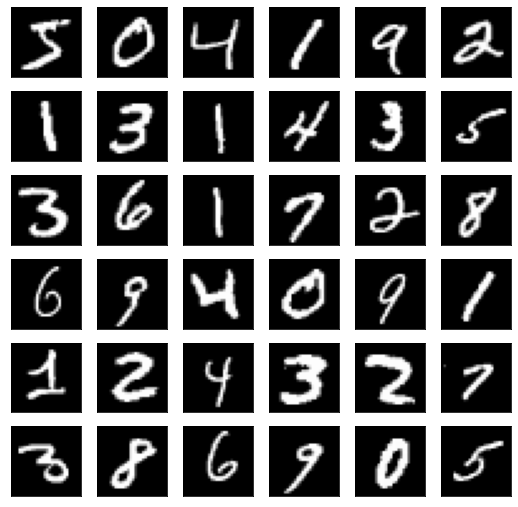

In [5]:
fig = plt.figure(figsize=(9,9))

for i in range(36):
    ax = fig.add_subplot(6,6,i+1, xticks=[],yticks=[])
    ax.imshow(x_train[i], cmap="gist_gray")

## 画像データの前処理

In [6]:
import keras
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)


# モデルの作成

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.2433 - accuracy: 0.9271 - val_loss: 0.0989 - val_accuracy: 0.9687
Epoch 2/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.1023 - accuracy: 0.9693 - val_loss: 0.0874 - val_accuracy: 0.9744
Epoch 3/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.0746 - accuracy: 0.9772 - val_loss: 0.0883 - val_accuracy: 0.9764
Epoch 4/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.0606 - accuracy: 0.9815 - val_loss: 0.0803 - val_accuracy: 0.9783
Epoch 5/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0787 - val_accuracy: 0.9810
Epoch 6/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0440 - accuracy: 0.9867 - val_loss: 0.0757 - val_accuracy: 0.9815
Epoch 7/20
60000/60000 [==============================] 

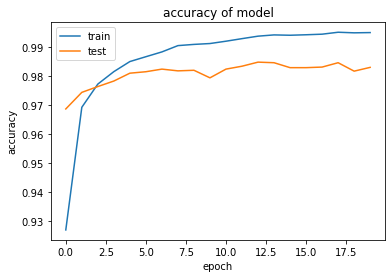

In [7]:
# 全結合層3層のみのシンプルなモデル
# Dropoutは、訓練時に一定確率で中間層を無視する関数。過学習を防ぐために使用
from keras.engine import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import RMSprop

inputs = Input(shape=(784,))

nw = Dense(512, activation='relu')(inputs)
nw = Dropout(.2)(nw)
nw = Dense(512, activation='relu')(nw)
nw = Dropout(.2)(nw)
predictions = Dense(10, activation='softmax')(nw)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test,y_test))

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("accuracy of model")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

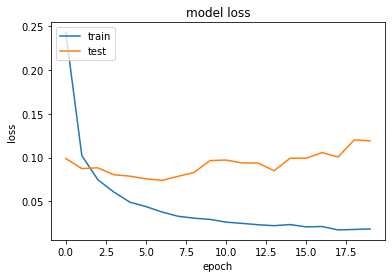

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()